In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from xgboost import XGBRegressor
import os

In [2]:
# Loading the dataset
df = pd.read_csv('indian_rda_based_diet_recommendation_system.csv')


In [3]:
# Inspecting the dataset
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     89 non-null     object 
 1   Breakfast      89 non-null     int64  
 2   Lunch          89 non-null     int64  
 3   Dinner         89 non-null     int64  
 4   VegNovVeg      89 non-null     object 
 5   Calories       89 non-null     int64  
 6   Fats           89 non-null     float64
 7   Proteins       89 non-null     float64
 8   Iron           89 non-null     float64
 9   Calcium        89 non-null     float64
 10  Sodium         89 non-null     int64  
 11  Potassium      89 non-null     float64
 12  Carbohydrates  89 non-null     float64
 13  Fibre          89 non-null     float64
 14  VitaminD       89 non-null     int64  
 15  Sugars         89 non-null     float64
dtypes: float64(8), int64(6), object(2)
memory usage: 11.3+ KB


Food_items       0
Breakfast        0
Lunch            0
Dinner           0
VegNovVeg        0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
dtype: int64

In [4]:
# Handling missing values (Imputation or Removal)
# You can impute missing values with mean or median or drop rows with missing values
# Dropping rows with missing values for simplicity
df = df.dropna()

# Alternatively, for imputation:
# df.fillna(df.median(), inplace=True)
# Creating a DataFrame


In [5]:
# Modifying specific columns
# Creating a DataFrame
df.loc[0, 'VegNovVeg'] = 0
df['VegNovVeg'] = df['VegNovVeg'].astype('int64')


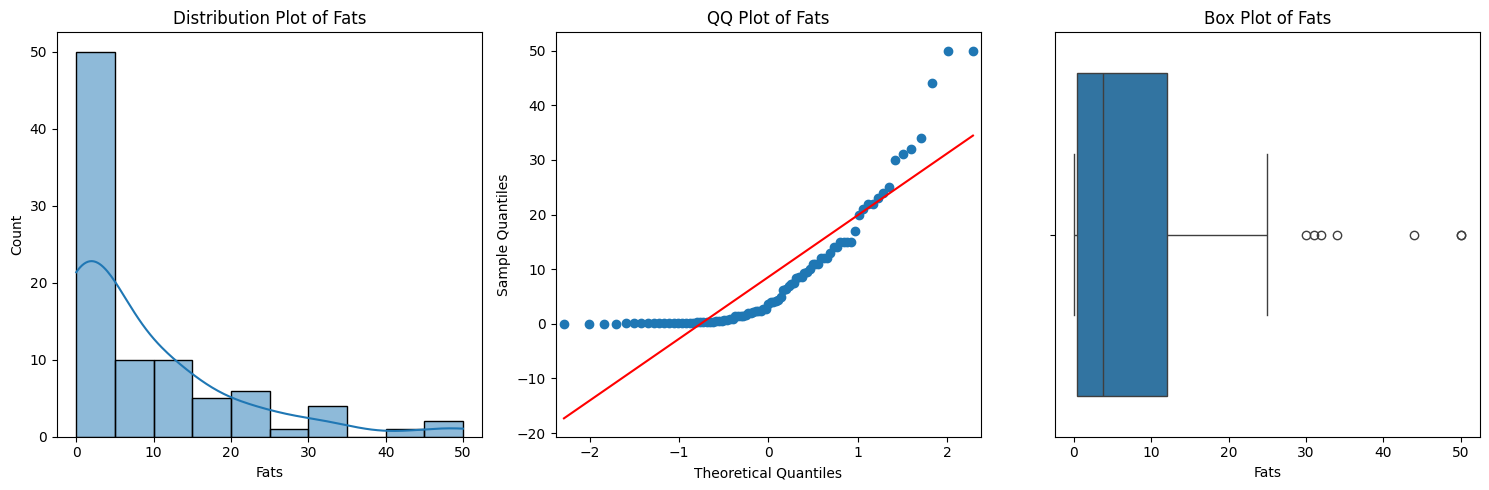

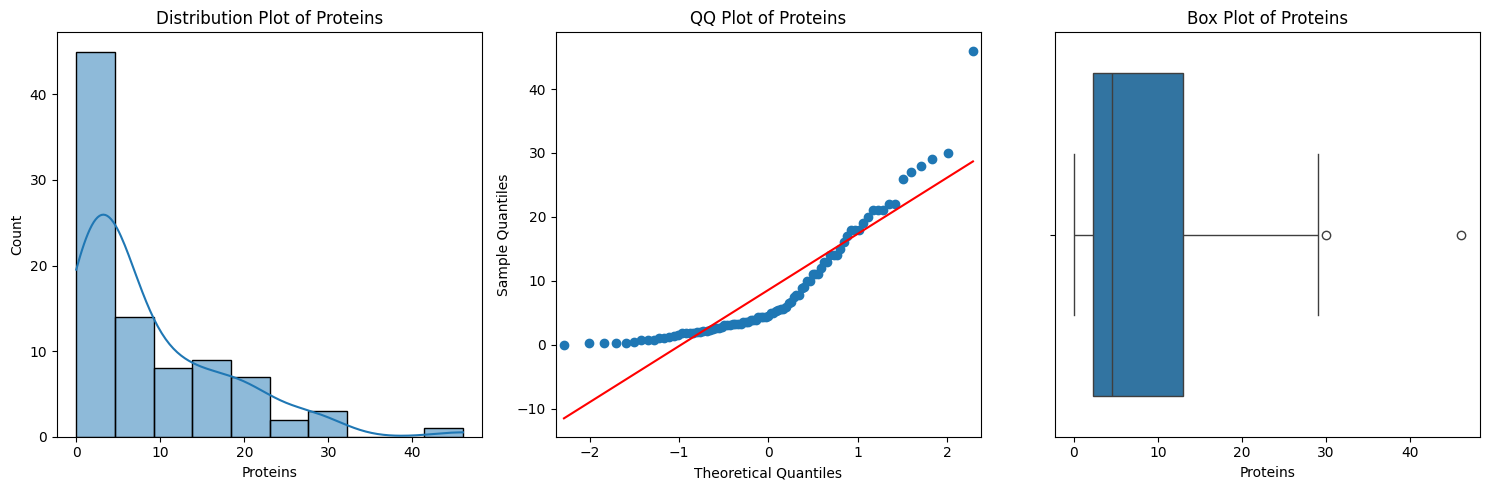

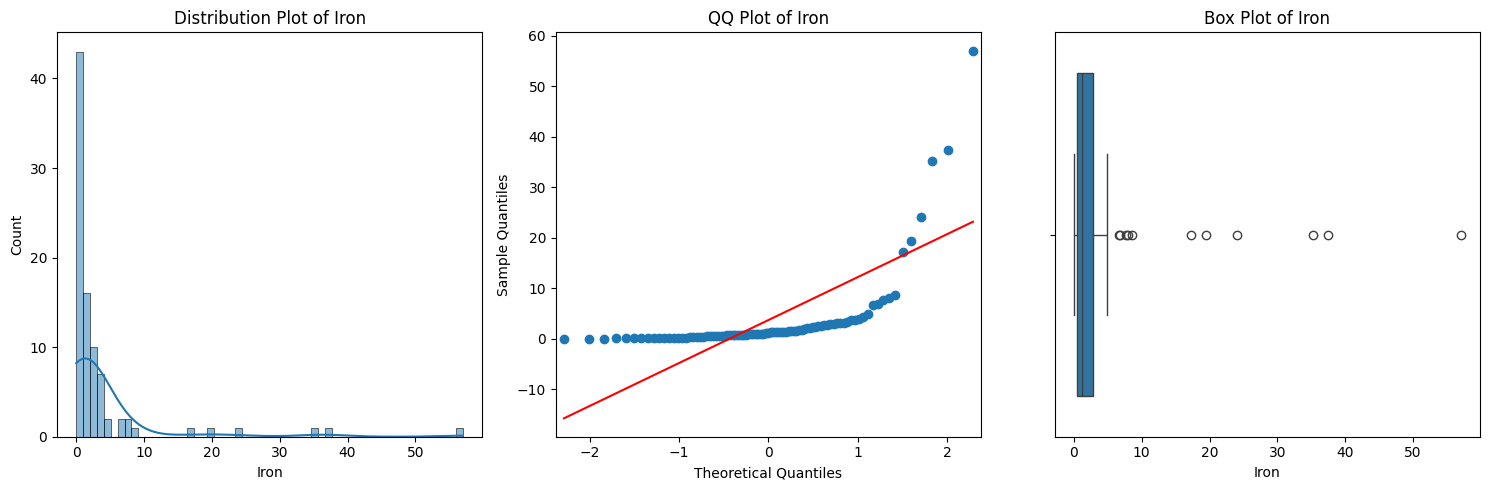

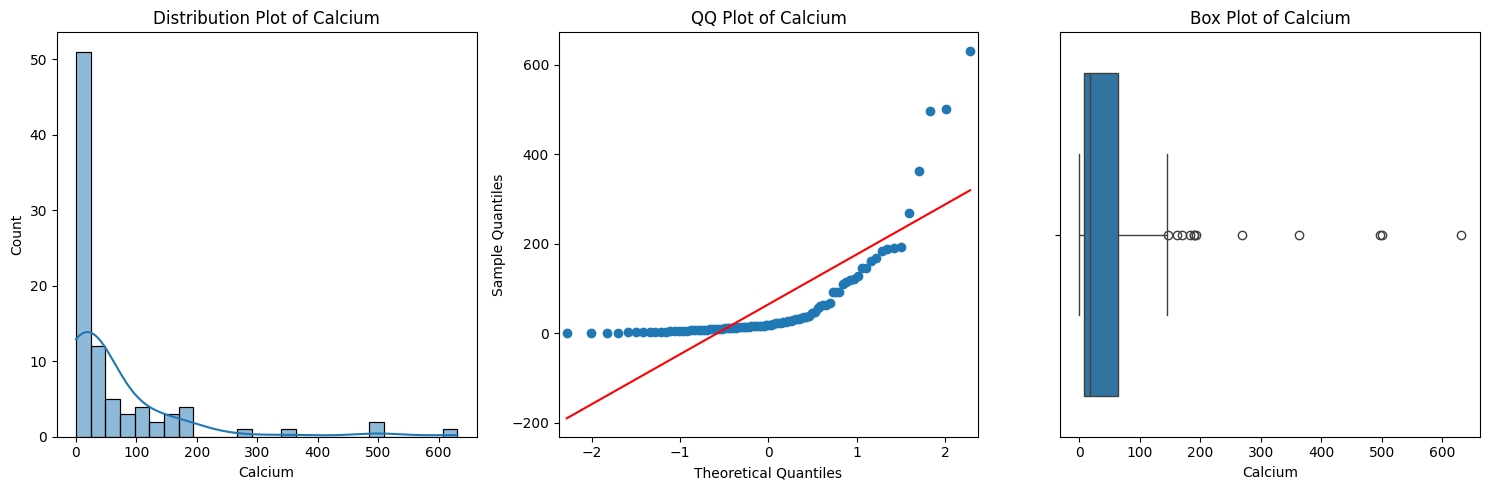

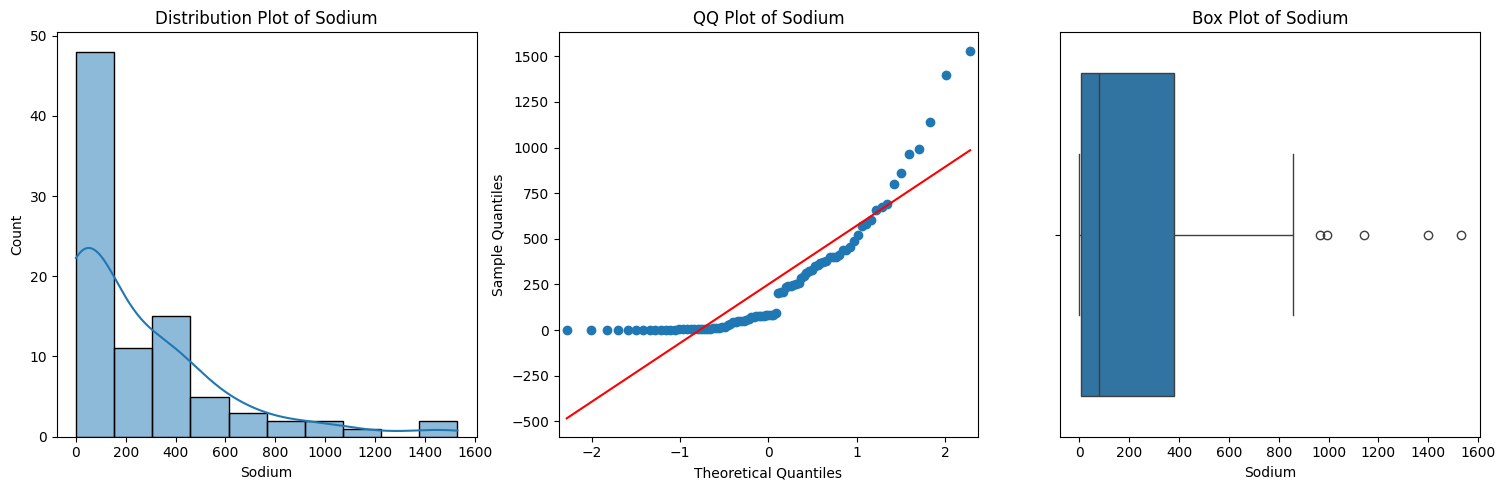

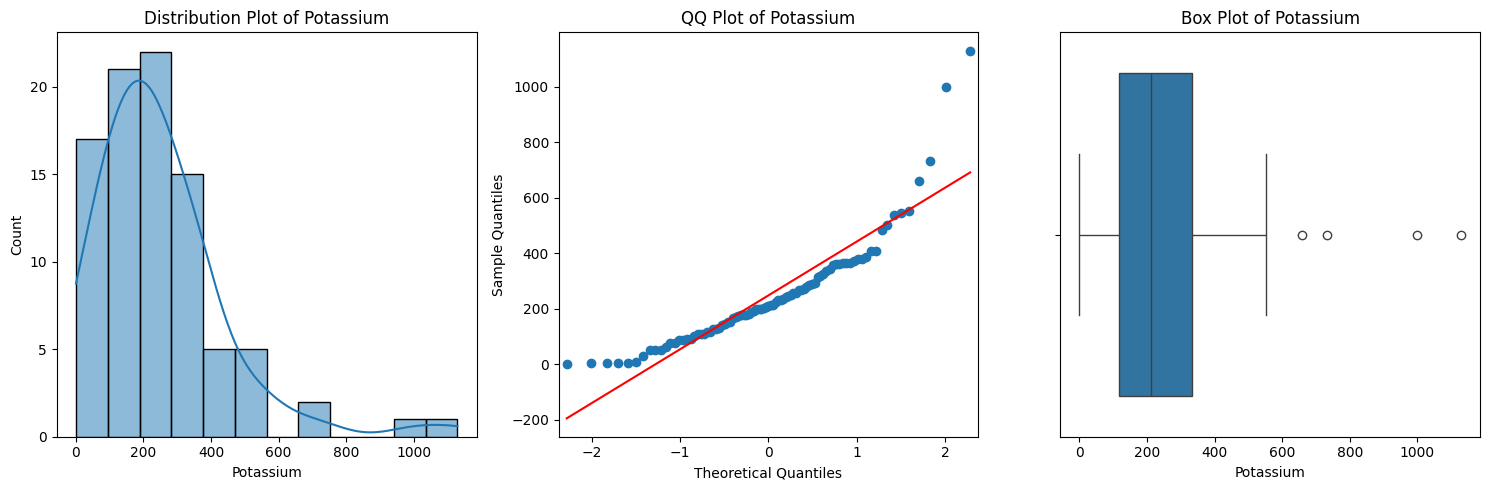

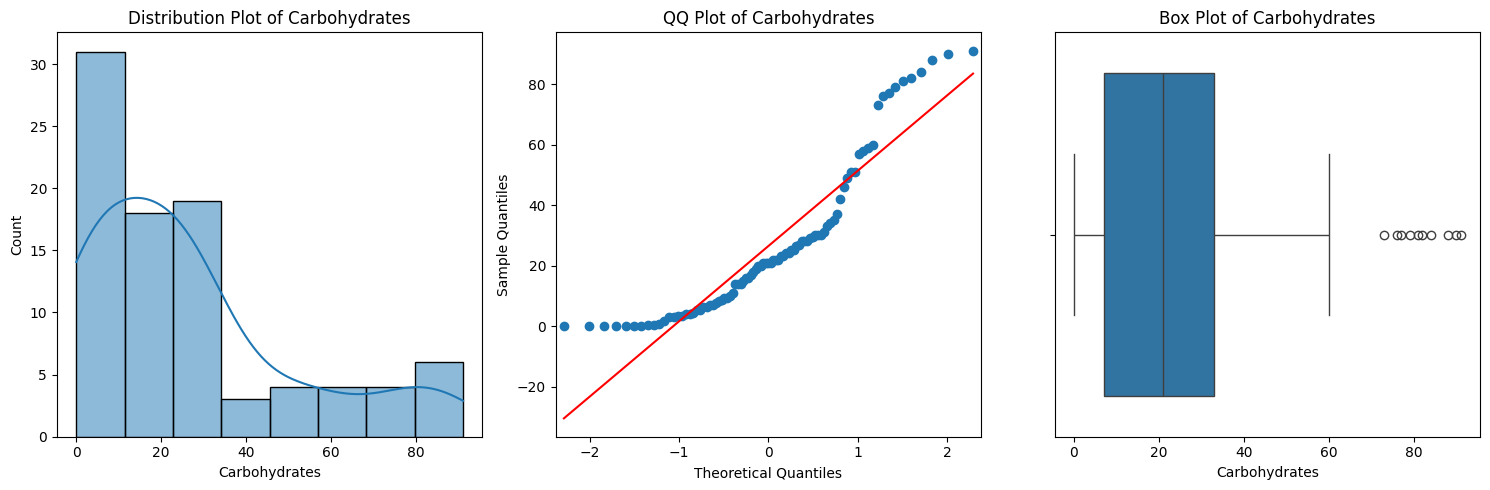

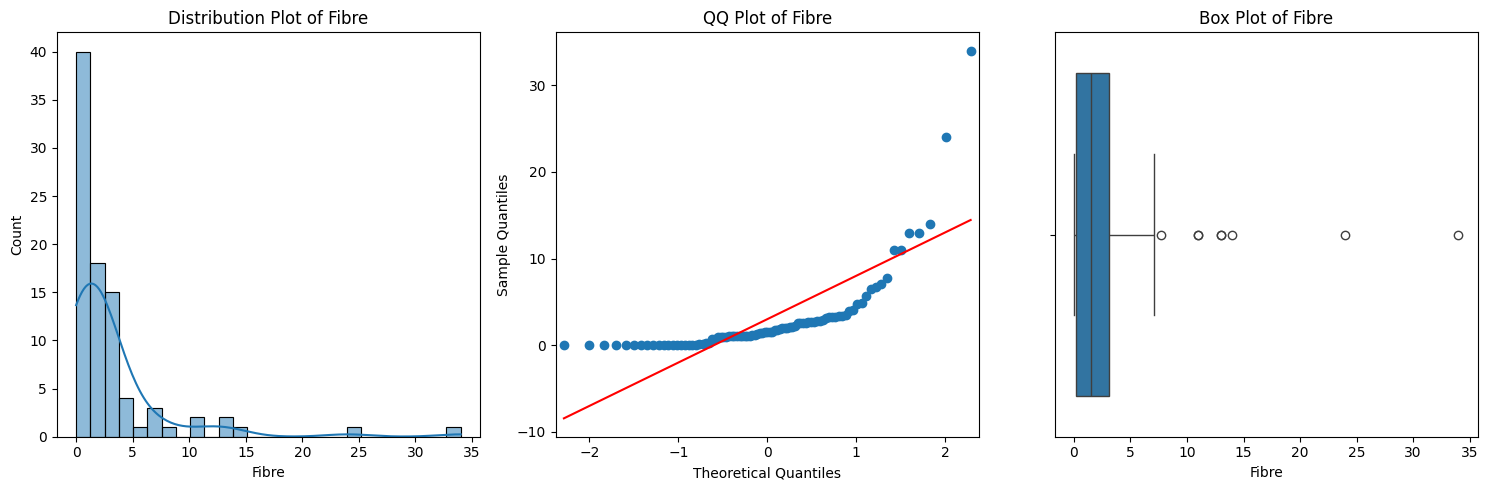

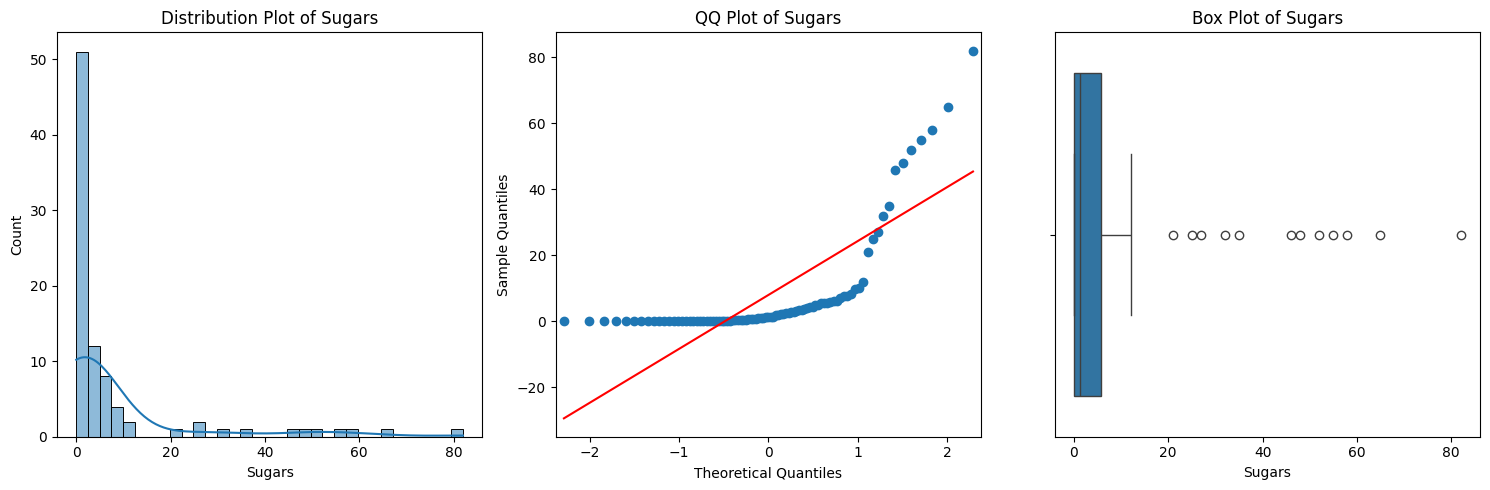

In [6]:
# Data visualization
features = ['Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'Sugars']

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Distribution plot
    sns.histplot(df[feature], ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution Plot of {feature}')
    
    # QQ plot
    sm.qqplot(df[feature], line='s', ax=axes[1])
    axes[1].set_title(f'QQ Plot of {feature}')
    
    # Box plot
    sns.boxplot(x=df[feature], ax=axes[2])
    axes[2].set_title(f'Box Plot of {feature}')
    
    plt.tight_layout()
    plt.show()

In [7]:
# Selecting features and target variable
X = df[['Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'Sugars']]
y = df['Calories']

In [8]:
# Normalizing the data using StandardScaler (XGBoost performs better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# XGBoost model with enhanced hyperparameter tuning
xgb_regressor = XGBRegressor()

In [11]:
# Expanded hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [12]:
# GridSearchCV for hyperparameter tuning
xgb_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters from GridSearchCV
best_params = xgb_grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Predicting on the test data
y_pred = xgb_grid_search.predict(X_test)

In [ ]:
# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Explained Variance Score (EVS):", evs)

In [ ]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# GUI for Calorie Finder using Tkinter
import tkinter as tk
from tkinter import messagebox

df = pd.read_csv('indian_rda_based_diet_recommendation_system.csv')

def find_calories():
    food_name = entry_food.get().lower()
    row = df[df['Food_items'].str.lower() == food_name]
    if not row.empty:
        calories = row['Calories'].values[0]
        messagebox.showinfo("Calories Found", f"The calories in {food_name.capitalize()} are: {calories}")
    else:
        messagebox.showinfo("Calories Not Found", f"Sorry, {food_name.capitalize()} is not in the dataset.")

root = tk.Tk()
root.title("Calorie Finder")

label_food = tk.Label(root, text="Enter the name of the food:")
label_food.pack()

entry_food = tk.Entry(root)
entry_food.pack()

button_find = tk.Button(root, text="Find Calories", command=find_calories)
button_find.pack()

root.mainloop()